# 25.9 - Podobnost sekvencí

- Napište funkci generující náhodné řetězce o délce dané parametrem funkce z abecedy A={a,c,g,t}
- Předpokládejte, že se každá báze a,c,g,t vyskytuje v sekvenci se stejnou pravděpodobností. Mějme dvě sekvence o délce n. Kolik symbolů byste očekávali, že bude shodných?
- Napište funkci pro výpočet Hammingovy vzdálenosti dvou sekvencí a otestujte.
- Napište funkci, která spočítá editační vzdálenost pomocí dynamického programování.
- Změřte čas výpočtu s rostoucí délkou sekvencí. Pro jak dlouhé sekvence přesáhne doba výpočtu 30s?
- Uvažujme, že bychom chtěli spočítat editační vzdálenost mezi genomem člověka a šimpanzem (předpokládejme, že mají shodnou délku 3.2Gbp), jak velká by byla tabulka pro dynamické programování?

In [2]:
import random
import numpy as np
import pandas as pd
import time

### Napište funkci generující náhodné řetězce o délce dané parametrem funkce z abecedy A={a,c,g,t}

In [3]:
def gen(n, alphabet):
    seq = ''
    for i in range(n):
        char = random.choice(alphabet)
        seq += char    
    return seq

In [4]:
N = 10
ALPHABET = ['A', 'C', 'G', 'T']

A = gen(10, ALPHABET)
print(A)

CTAATCGTAG


In [5]:
test_a = gen(N, ALPHABET)
test_a

'GGTTGTTCAC'

In [6]:
test_b = gen(N, ALPHABET)
test_b

'GCGTCGGGCC'

### Předpokládejte, že se každá báze a,c,g,t vyskytuje v sekvenci se stejnou pravděpodobností. Mějme dvě sekvence o délce n. Kolik symbolů byste očekávali, že bude shodných?

...

### Napište funkci pro výpočet Hammingovy vzdálenosti dvou sekvencí a otestujte


In [7]:
#Same lenght A and B
def hamming_distance(A, B):
    n_a = np.array(list(A))
    n_b = np.array(list(B))
    
    comp = n_a == n_b
    
    res = np.where(comp == 1)
    
    return len(res)

In [8]:
res = hamming_distance(test_a, test_b)
res

1

### Napište funkci, která spočítá editační vzdálenost pomocí dynamického programování.

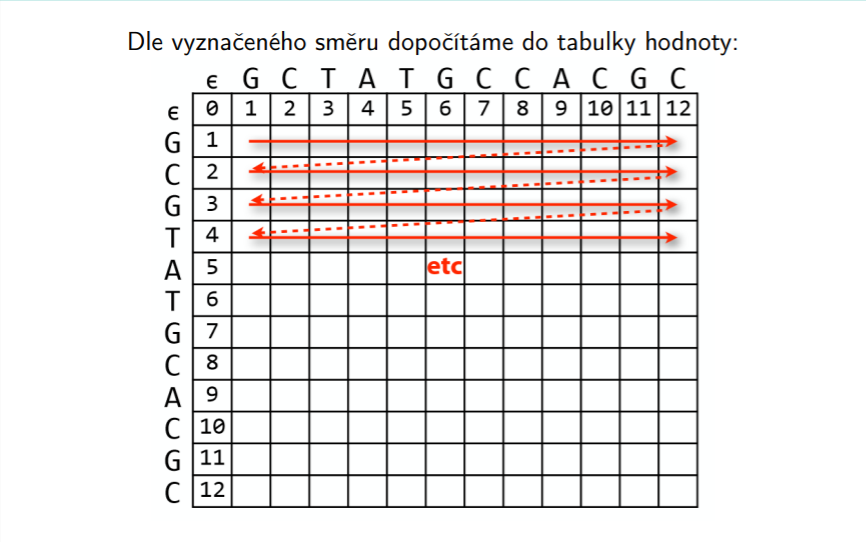

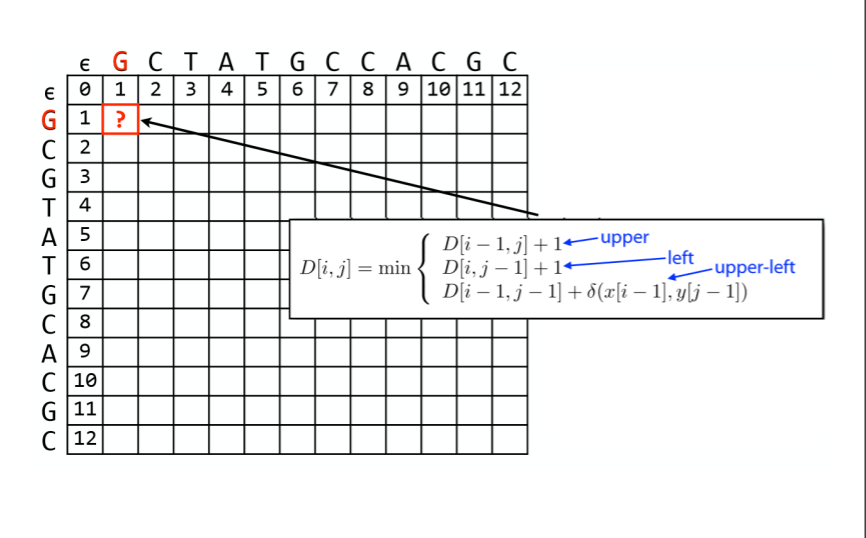

In [9]:
y = 'GCTATGCCACGC'
x = 'GCGTATGCACGC' 

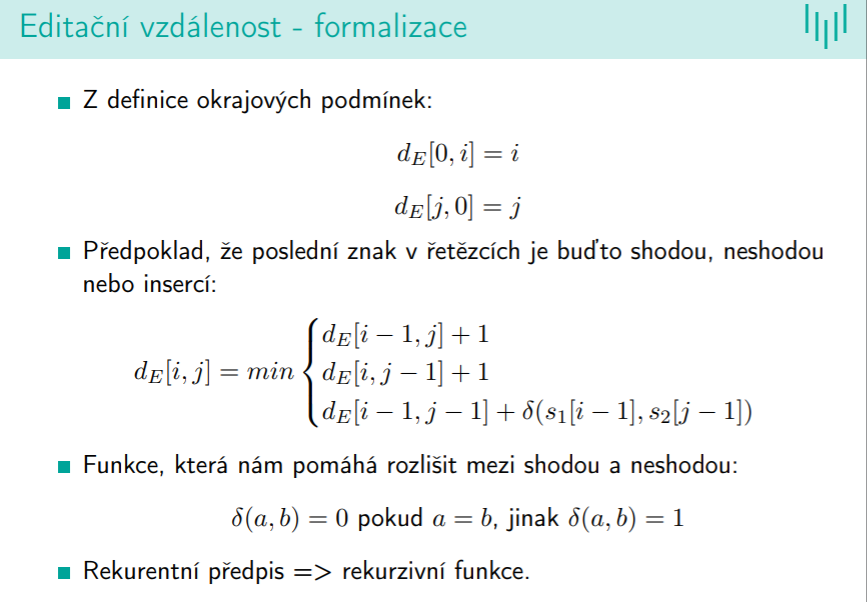

In [10]:
def delta(a, b):
    return 0 if a == b else 1

In [11]:
def formula_calc(M, row_i, col_i, x, y):
    
    upper = M[row_i - 1, col_i] + 1
    left = M[row_i, col_i - 1] + 1
    upper_left = M[row_i - 1, col_i - 1] + delta(x[row_i-1], y[col_i-1])
    
    return np.min([upper, left, upper_left])    

In [12]:
def edit_distance(x, y, verbose=False):
    
    tic = time.time()
    
    l_a = len(x)
    l_b = len(y)
    
    e_l_a = l_a + 1
    e_l_b = l_b + 1
    
    M = np.zeros(shape=(e_l_a, e_l_b))
    
    
    if verbose:
        print(f'Current input is:\n \n\tx={x}\n\ty={y}\n')
    
    
    
    #Doplníme hodnoty D[0, i] = i a D[j, 0] = j
    
    M[0, 0] = 0
    M[1:, 0] = list(range(1, l_a+1, 1))
    M[0, 1:] = list(range(1, l_b+1, 1))
    
    
    #Dle vyznačeného směru dopočítáme do tabulky hodnoty:
    
    for row_i in range(1, e_l_a):
        for col_i in range(1, e_l_b):
            M[row_i, col_i] = formula_calc(M, row_i, col_i, x, y)
    
    tac = time.time()
    
    runtime = tac - tic
    
    empty = list('e')
    indicies = empty+list(x)
    columns = empty+list(y)
    
    if verbose:
        print('Current result is:\n')
        print(pd.DataFrame(M, index=indicies, columns=columns))
        print(f'\nRunning time is:\n\n {runtime}')

    return (M, runtime)

In [13]:
edit_distance(x, y, True);

Current input is:
 
	x=GCGTATGCACGC
	y=GCTATGCCACGC

Current result is:

      e     G     C    T    A    T    G    C    C    A     C     G     C
e   0.0   1.0   2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  11.0  12.0
G   1.0   0.0   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0   9.0  10.0  11.0
C   2.0   1.0   0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0   9.0  10.0
G   3.0   2.0   1.0  1.0  2.0  3.0  3.0  4.0  5.0  6.0   7.0   8.0   9.0
T   4.0   3.0   2.0  1.0  2.0  2.0  3.0  4.0  5.0  6.0   7.0   8.0   9.0
A   5.0   4.0   3.0  2.0  1.0  2.0  3.0  4.0  5.0  5.0   6.0   7.0   8.0
T   6.0   5.0   4.0  3.0  2.0  1.0  2.0  3.0  4.0  5.0   6.0   7.0   8.0
G   7.0   6.0   5.0  4.0  3.0  2.0  1.0  2.0  3.0  4.0   5.0   6.0   7.0
C   8.0   7.0   6.0  5.0  4.0  3.0  2.0  1.0  2.0  3.0   4.0   5.0   6.0
A   9.0   8.0   7.0  6.0  5.0  4.0  3.0  2.0  2.0  2.0   3.0   4.0   5.0
C  10.0   9.0   8.0  7.0  6.0  5.0  4.0  3.0  2.0  3.0   2.0   3.0   4.0
G  11.0  10.0   9.0  8.0  7.0  6.0  5.0  4.0  3.0  

### Změřte čas výpočtu s rostoucí délkou sekvencí. Pro jak dlouhé sekvence přesáhne doba výpočtu 30s? Edited to 1s

In [14]:
EXPECTED_TIME = 1

In [15]:
def isOver(seq_size, alphabet, over):
    x = gen(seq_size, alphabet) 
    y = gen(seq_size, alphabet)
    res = edit_distance(x, y)
    D, time = res
    print(time)
    return time > over  

In [16]:
def measure_time(start, stop, expected_time=EXPECTED_TIME):
    print('Measuring time...')
    
    for i in range(start, stop):
        res = isOver(i, ALPHABET, expected_time)
        print(f'Size={i} isOver={res}')
    
    print('End of measuring time...')    

In [17]:
def measure_time_while(expected_time=EXPECTED_TIME):
    print('Measuring time...')
    count = 1
    while True:
        res = isOver(count, ALPHABET, expected_time)
        count += 1
        print(f'Size={count} isOver={res}')
        if res == True:
            return count - 1
    print('End of measuring time...')    

In [20]:
measure_time(200, 202)

Measuring time...
1.0806939601898193
Size=200 isOver=True
0.9179584980010986
Size=201 isOver=False
End of measuring time...


In [21]:
#res = measure_time_while()

### Uvažujme, že bychom chtěli spočítat editační vzdálenost mezi genomem člověka a šimpanzem (předpokládejme, že mají shodnou délku 3.2Gbp), jak velká by byla tabulka pro dynamické programování?

....

In [275]:
table_size = (3.2 * (1000**3))/8

table_size

400000000.0

400mil x 400mil